In [280]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [281]:
cofactorsmapped = pd.read_csv("data/cofactors_mapped_combined.csv").drop("Unnamed: 0", axis = 1)
mediator = cofactorsmapped[cofactorsmapped["Complex"] == "Mediator"].set_index("Bgee")
mediator["Subcomplex or Module"] = mediator["Subcomplex or Module"].apply(lambda x: x.replace("]", "").replace("[", "").split(", "))
mediator.head()

,Gene Name,Complex,Subcomplex or Module,Own-complex paralog,Other-complex Paralogues,Notes,Source,UniprotID,Entry Name,Protein names,Gene Names,Sequence,Ensembl,GeneID,PDB,Primary Gene Name
Bgee,,,,,,,,,,,,,,,,
ENSG00000133997,MED6,Mediator,[Head],NaN,NaN,NaN,Malik and Roeder (2023),O75586,MED6_HUMAN,Mediator of RNA polymerase II transcription su...,MED6 ARC33,MAAVDIRDNLLGISWVDSSWIPILNSGSVLDYFSERSNPFYDRTCN...,ENST00000256379.10 [O75586-1];ENST00000430055....,10001.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED6
ENSG00000159479,MED8,Mediator,[Head],NaN,NaN,NaN,Malik and Roeder (2023),Q96G25,MED8_HUMAN,Mediator of RNA polymerase II transcription su...,MED8,MQREEKQLEASLDALLSQVADLKNSLGSFICKLENEYGRLTWPSVL...,ENST00000290663.10 [Q96G25-2];ENST00000372455....,112950.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED8
ENSG00000161920,MED11,Mediator,[Head],NaN,NaN,NaN,Malik and Roeder (2023),Q9P086,MED11_HUMAN,Mediator of RNA polymerase II transcription su...,MED11 HSPC296,MATYSLANERLRALEDIEREIGAILQNAGTVILELSKEKTNERLLD...,ENST00000293777.6;,400569.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED11
ENSG00000042429,MED17,Mediator,"[Head, Middle]",NaN,NaN,Central scaffold of head unit,Malik and Roeder (2023),Q9NVC6,MED17_HUMAN,Mediator of RNA polymerase II transcription su...,MED17 ARC77 CRSP6 DRIP77 DRIP80 TRAP80,MSGVRAVRISIESACEKQVHEVGLDGTETYLPPLSMSQNLARLAQR...,ENST00000251871.9 [Q9NVC6-1];,9440.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED17
ENSG00000130772,MED18,Mediator,[Head],NaN,NaN,NaN,Malik and Roeder (2023),Q9BUE0,MED18_HUMAN,Mediator of RNA polymerase II transcription su...,MED18,MEAPPVTMMPVTGGTINMMEYLLQGSVLDHSLESLIHRLRGLCDNM...,ENST00000373842.9;ENST00000398997.2;ENST000006...,54797.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED18


In [282]:
scrna = pd.read_csv("helperdata/cofactor_scRNA.csv").drop("Unnamed: 0", axis = 1)
scRNA_mediator = scrna[[x in mediator.index.to_list() for x in scrna["Ensembl"]]].set_index("Ensembl")
scRNA_mediator.head()

,Gene,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000008838,MED24,15.5,16.9,31.7,12.4,12.1,10.1,11.0,193.3,12.6,...,8.2,14.6,10.2,12.6,13.4,11.5,13.5,20.7,10.7,28.5
ENSG00000042429,MED17,8.0,5.6,5.1,15.5,27.5,11.3,7.8,8.9,18.6,...,2.7,11.7,9.6,10.7,7.1,13.2,7.8,13.8,23.2,11.5
ENSG00000063322,MED29,31.4,24.0,35.2,8.4,36.6,23.4,40.3,30.7,23.3,...,46.2,48.8,36.0,31.1,15.3,27.7,26.8,30.0,43.1,27.3
ENSG00000099917,MED15,23.9,49.9,27.5,25.1,20.2,29.7,19.0,23.5,21.9,...,27.2,11.7,21.6,21.9,13.7,25.1,27.6,61.3,40.8,20.9
ENSG00000104973,MED25,9.9,15.3,15.0,16.1,18.4,10.1,13.2,16.6,12.6,...,76.2,26.3,11.7,49.1,42.7,11.4,13.4,40.2,13.5,21.5


In [283]:
specificity = pd.read_csv("helperdata/cofactor_specificity.csv").drop("Unnamed: 0", axis = 1)
scRNA_specificity = specificity[[x in mediator.index.to_list() for x in specificity["Ensembl"]]].set_index("Ensembl")
scRNA_specificity.head()

,Gene,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,,,,,,,,,,,,,,
ENSG00000008838,MED24,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,"{'Basal respiratory cells': '193.3', 'Ionocyte...",Low cell type specificity,Detected in all,NaN,NaN,0.22,0.26,0.05,0.48,0.08
ENSG00000042429,MED17,Low tissue specificity,Detected in many,NaN,NaN,Cell type enhanced,Detected in many,NaN,{'Rod photoreceptor cells': '49.4'},Low cell type specificity,Detected in all,NaN,NaN,0.36,0.25,0.17,0.39,0.11
ENSG00000063322,MED29,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.23,0.14,0.05,0.27,0.13
ENSG00000099917,MED15,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.21,0.23,0.06,0.24,0.12
ENSG00000104973,MED25,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,{'Late spermatids': '108.4'},Low cell type specificity,Detected in all,NaN,NaN,0.27,0.63,0.11,0.37,0.27


In [284]:
scRNA_taus = scRNA_specificity[[x for x in scRNA_specificity.columns.to_list() if "TAU" in x]]
scRNA_taus = scRNA_taus.applymap(lambda x: np.NaN if x == "Not detected" else float(x))
scRNA_taus.head()

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_56808/1983826795.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scRNA_taus = scRNA_taus.applymap(lambda x: np.NaN if x == "Not detected" else float(x))


,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,
ENSG00000008838,0.22,0.26,0.05,0.48,0.08
ENSG00000042429,0.36,0.25,0.17,0.39,0.11
ENSG00000063322,0.23,0.14,0.05,0.27,0.13
ENSG00000099917,0.21,0.23,0.06,0.24,0.12
ENSG00000104973,0.27,0.63,0.11,0.37,0.27


In [285]:
mediator_combined = scRNA_mediator[["Gene"]].copy()
mediator_combined = mediator_combined.join(mediator[["Subcomplex or Module"]])
mediator_combined["Fraction Expressed"] = scRNA_mediator.apply(lambda x: np.count_nonzero(x)/len(x), axis=1)
mediator_combined = mediator_combined.join(scRNA_taus)
mediator_combined.head()

,Gene,Subcomplex or Module,Fraction Expressed,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,,,,
ENSG00000008838,MED24,[Tail],1.0,0.22,0.26,0.05,0.48,0.08
ENSG00000042429,MED17,"[Head, Middle]",1.0,0.36,0.25,0.17,0.39,0.11
ENSG00000063322,MED29,[Tail],1.0,0.23,0.14,0.05,0.27,0.13
ENSG00000099917,MED15,[Tail],1.0,0.21,0.23,0.06,0.24,0.12
ENSG00000104973,MED25,[Tail],1.0,0.27,0.63,0.11,0.37,0.27


In [286]:
def get_module(modulename):
    module = mediator_combined[[modulename in x for x in mediator_combined["Subcomplex or Module"]]].drop("Subcomplex or Module", axis = 1).set_index("Gene")
    return module

def meltmodule(moduledf, taulist):
    moduleplt = moduledf.reset_index().drop("Fraction Expressed", axis=1).melt(id_vars="Gene", var_name="Category", value_name="Tau Score")
    moduleplt["Category"] = moduleplt["Category"].apply(lambda x: x.replace("TAU score - ", ""))
    moduleplt["Specificity"] = moduleplt["Tau Score"].apply(lambda x: "Specific" if x > 0.4 else "Unspecific")
    moduleplt = moduleplt[[x in taulist for x in moduleplt["Category"]]]
    return moduleplt


In [287]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_56808/4236845216.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0)


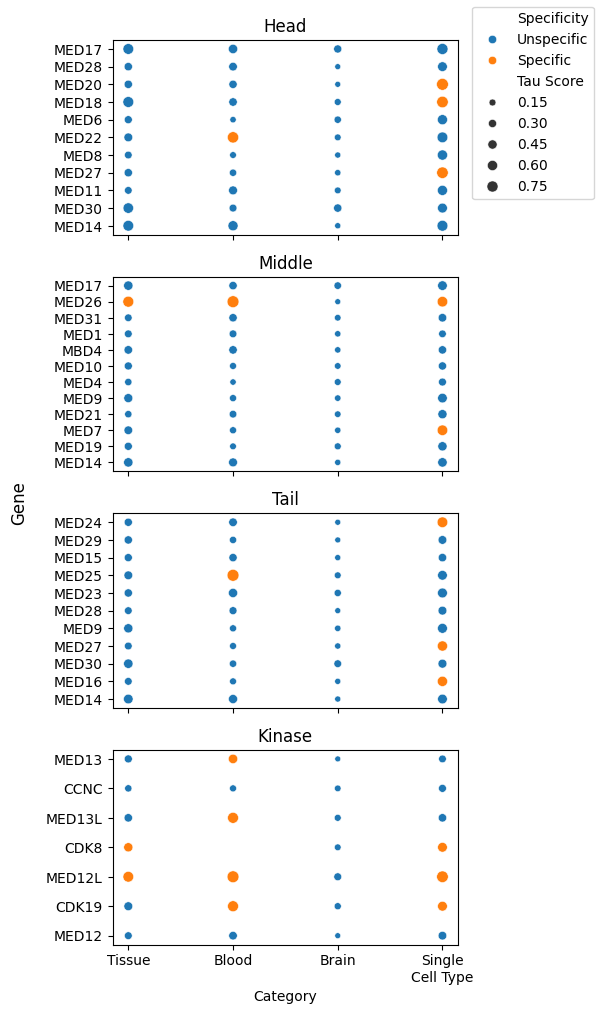

In [288]:

labellst = ["Head", "Middle", "Tail", "Kinase"]
taulst = ["Tissue", "Single Cell Type", "Blood", "Brain"]

fig, axs = plt.subplots(len(labellst), figsize = (6, 10), sharex=True)
fig.supylabel("Gene")

for label_i in range(len(labellst)):
    label = labellst[label_i]
    module = get_module(label)
    moduleplt = meltmodule(module, taulst)
    sns.scatterplot(moduleplt, y = "Gene", x = "Category", size = "Tau Score", hue = "Specificity", ax= axs[label_i], legend=True)
    handles, labels = axs[label_i].get_legend_handles_labels()
    axs[label_i].clear()
    sns.scatterplot(moduleplt, y = "Gene", x = "Category", size = "Tau Score", hue = "Specificity", ax= axs[label_i], legend=False)
    axs[label_i].set_ylabel('')
    axs[label_i].set_title(label)


plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Prevent overlap, leave space for legend
fig.legend(
    handles=handles,
    labels=labels,
    loc = "upper right"
)
plt.tight_layout(rect=[0, 0, 0.85, 1])
wrap_labels(axs[label_i], 10)

plt.savefig("figures/mediatorspecificity.png")


In [289]:
kinase = meltmodule(get_module("Kinase"), taulst)
kinase_specific = kinase[kinase["Specificity"] == "Specific"]
kinase_specific = scRNA_specificity[[x in kinase_specific["Gene"].unique() for x in scRNA_specificity["Gene"]]]

In [290]:
def RNAcellspecificity(df):
    df = df[["Gene", "RNA single cell type specific nTPM"]]

    cellspecific_cells = pd.DataFrame({"Cell Type": [], "Genes": []}).set_index("Cell Type")

    for _, row in df.iterrows():
        celldict = row["RNA single cell type specific nTPM"]
        if pd.notna(celldict):
            cell_dict = ast.literal_eval(celldict)
            for cell, _ in cell_dict.items():
                if cell not in cellspecific_cells.index.to_list():
                    cellspecific_cells.loc[cell] = [[]]
                cellspecific_cells.at[cell, "Genes"].append(row["Gene"])

    return cellspecific_cells

def subcomplex_RNAcellspecificity(label):
    module = meltmodule(get_module(label), taulst)
    modulespecific = module[module["Specificity"] == "Specific"]
    modulespecific = scRNA_specificity[[x in modulespecific["Gene"].unique() for x in scRNA_specificity["Gene"]]]
    return RNAcellspecificity(modulespecific)


head = subcomplex_RNAcellspecificity("Head")
middle = subcomplex_RNAcellspecificity("Middle")
tail = subcomplex_RNAcellspecificity("Tail")
kinase = subcomplex_RNAcellspecificity("Kinase")

In [291]:
head

,Genes
Cell Type,
Syncytiotrophoblasts,[MED20]
Excitatory neurons,[MED27]
Oligodendrocytes,[MED27]


In [292]:
middle

,Genes
Cell Type,
dendritic cells,[MED26]
Early spermatids,"[MED26, MED7]"
Late spermatids,"[MED26, MED7]"
Spermatocytes,"[MED26, MED7]"


In [293]:
tail

,Genes
Cell Type,
Basal respiratory cells,[MED24]
Ionocytes,[MED24]
Late spermatids,[MED25]
Excitatory neurons,[MED27]
Oligodendrocytes,[MED27]
Oocytes,[MED16]


In [294]:
kinase

,Genes
Cell Type,
Microglial cells,[MED13L]
Oligodendrocyte precursor cells,"[MED13L, CDK8, MED12L, CDK19]"
Excitatory neurons,"[CDK8, MED12L]"
Inhibitory neurons,"[CDK8, MED12L]"
Late spermatids,"[CDK8, CDK19]"
Oligodendrocytes,"[CDK8, CDK19]"
Astrocytes,[MED12L]
Prostatic glandular cells,[CDK19]


In [295]:
med12L = mediator[mediator["Gene Name"] == "MED12L"]
med12L.head()

,Gene Name,Complex,Subcomplex or Module,Own-complex paralog,Other-complex Paralogues,Notes,Source,UniprotID,Entry Name,Protein names,Gene Names,Sequence,Ensembl,GeneID,PDB,Primary Gene Name
Bgee,,,,,,,,,,,,,,,,
ENSG00000144893,MED12L,Mediator,[Kinase],[MED12],NaN,NaN,"Nayak, Shraddha et al. (2022)",Q86YW9,MD12L_HUMAN,Mediator of RNA polymerase II transcription su...,MED12L KIAA1635 TNRC11L TRALP TRALPUSH PRO0314,MAAFGLLSYEQRPLKRPRLGPPDVYPQDPKQKEDELTAVNVKQGFN...,ENST00000309237.8 [Q86YW9-3];ENST00000422248.6...,116931.0,NaN,MED12L


In [296]:
med12 = mediator[mediator["Gene Name"] == "MED12"]
med12["Sequence"][0]

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_56808/892147568.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  med12["Sequence"][0]


'MAAFGILSYEHRPLKRPRLGPPDVYPQDPKQKEDELTALNVKQGFNNQPAVSGDEHGSAKNVSFNPAKISSNFSSIIAEKLRCNTLPDTGRRKPQVNQKDNFWLVTARSQSAINTWFTDLAGTKPLTQLAKKVPIFSKKEEVFGYLAKYTVPVMRAAWLIKMTCAYYAAISETKVKKRHVDPFMEWTQIITKYLWEQLQKMAEYYRPGPAGSGGCGSTIGPLPHDVEVAIRQWDYTEKLAMFMFQDGMLDRHEFLTWVLECFEKIRPGEDELLKLLLPLLLRYSGEFVQSAYLSRRLAYFCTRRLALQLDGVSSHSSHVISAQSTSTLPTTPAPQPPTSSTPSTPFSDLLMCPQHRPLVFGLSCILQTILLCCPSALVWHYSLTDSRIKTGSPLDHLPIAPSNLPMPEGNSAFTQQVRAKLREIEQQIKERGQAVEVRWSFDKCQEATAGFTIGRVLHTLEVLDSHSFERSDFSNSLDSLCNRIFGLGPSKDGHEISSDDDAVVSLLCEWAVSCKRSGRHRAMVVAKLLEKRQAEIEAERCGESEAADEKGSIASGSLSAPSAPIFQDVLLQFLDTQAPMLTDPRSESERVEFFNLVLLFCELIRHDVFSHNMYTCTLISRGDLAFGAPGPRPPSPFDDPADDPEHKEAEGSSSSKLEDPGLSESMDIDPSSSVLFEDMEKPDFSLFSPTMPCEGKGSPSPEKPDVEKEVKPPPKEKIEGTLGVLYDQPRHVQYATHFPIPQEESCSHECNQRLVVLFGVGKQRDDARHAIKKITKDILKVLNRKGTAETDQLAPIVPLNPGDLTFLGGEDGQKRRRNRPEAFPTAEDIFAKFQHLSHYDQHQVTAQVSRNVLEQITSFALGMSYHLPLVQHVQFIFDLMEYSLSISGLIDFAIQLLNELSVVEAELLLKSSDLVGSYTTSLCLCIVAVLRHYHACLILNQDQMAQVFEGLCGVVKHGMNRSDGSSAERCILAYLYDLYTSCSHLKNKFGELFSDFCSK

In [297]:
mediator_combined[mediator_combined["Gene"] == "MED12L" ]

,Gene,Subcomplex or Module,Fraction Expressed,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,,,,
ENSG00000144893,MED12L,[Kinase],0.804878,0.68,0.88,0.26,0.84,0.28


In [298]:
mediator_combined[mediator_combined["Gene"] == "MED12"]

,Gene,Subcomplex or Module,Fraction Expressed,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,,,,
ENSG00000184634,MED12,[Kinase],0.987805,0.25,0.35,0.05,0.36,0.25


In [299]:
MED12_scrna = scRNA_mediator[scRNA_mediator["Gene"] == "MED12"]
MED12L_scrna = scRNA_mediator[scRNA_mediator["Gene"] == "MED12L"]


<Axes: ylabel='Gene'>

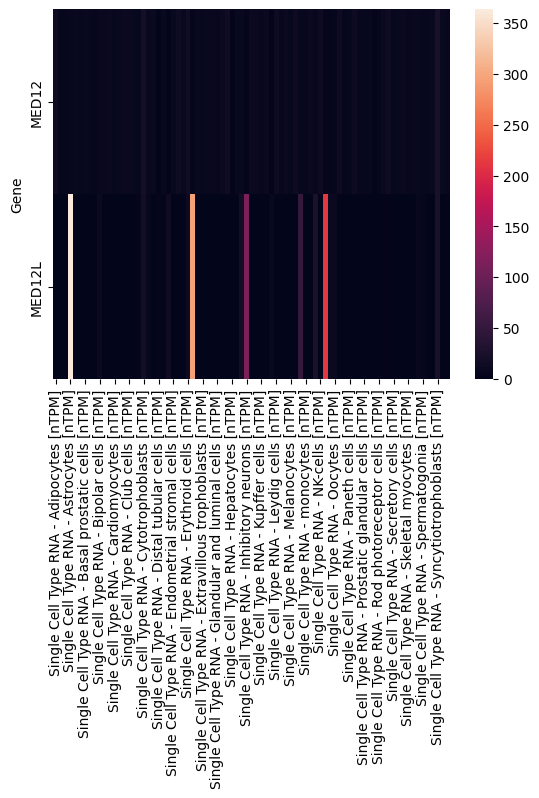

In [300]:
sns.heatmap(pd.concat([MED12_scrna, MED12L_scrna], axis=0).set_index("Gene"))

In [301]:
MED12L_scrna.head()

,Gene,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000144893,MED12L,0.0,0.0,0.2,363.5,1.3,1.4,0.7,0.4,1.1,...,0.0,1.0,0.5,6.9,4.6,0.3,0.5,24.2,0.6,0.1


In [302]:
tf_scrna = pd.read_csv("helperdata/TF_scRNA.csv").drop("Unnamed: 0", axis=1).set_index("Ensembl")
tf_scrna.head()

,Gene,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000137203,TFAP2A,1.7,0.2,0.3,0.0,0.1,106.0,63.2,46.0,158.0,...,0.0,0.0,4.9,7.8,16.4,139.1,115.4,700.8,1.1,1.1
ENSG00000008196,TFAP2B,0.5,0.0,0.0,0.0,0.2,7.4,0.6,0.1,92.0,...,0.0,0.0,2.3,1.4,0.7,23.1,2.4,4.1,0.1,0.0
ENSG00000087510,TFAP2C,1.3,3.5,10.6,3.7,0.7,95.0,22.0,2.6,105.0,...,0.0,0.0,5.8,0.2,1.6,70.5,92.4,107.6,1.0,1.6
ENSG00000008197,TFAP2D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
ENSG00000116819,TFAP2E,0.2,0.2,0.5,4.6,0.2,2.0,0.0,0.2,0.0,...,0.0,0.0,0.4,2.2,0.2,0.4,2.8,0.3,0.5,0.2


In [334]:
tf_scrna_genes = tf_scrna.set_index("Gene")
MED12L_scrna_arr = MED12L_scrna.iloc[0][1:]
MED12_scrna_arr = MED12_scrna.iloc[0][1:]

In [335]:
import scipy.stats as stat
from scipy.spatial import distance

In [336]:
MED12L_dists = []
MED12_dists = []
MED12L_corrs = []
MED12_corrs = []

for i in range(len(tf_scrna_genes)):
    row = tf_scrna_genes.iloc[i]
    MED12L_dists.append(distance.euclidean(MED12L_scrna_arr, row))
    MED12L_corrs.append(stat.pearsonr(MED12L_scrna_arr, row).statistic)
    MED12_dists.append(distance.euclidean(MED12_scrna_arr, row))
    MED12_corrs.append(stat.pearsonr(MED12_scrna_arr, row).statistic)

dist_df = pd.DataFrame({"Gene": tf_scrna_genes.index.to_list(), "Distance from MED12L": MED12L_dists, "Distance from MED12": MED12_dists,
                        "MED12L Corr": MED12L_corrs, "MED12 Corr": MED12_corrs})

dist_df.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,Gene,Distance from MED12L,Distance from MED12,MED12L Corr,MED12 Corr
0,TFAP2A,1009.807363,851.093414,-0.036825,0.481437
1,TFAP2B,652.741626,391.365609,-0.034220,-0.056669
2,TFAP2C,582.058013,236.859283,-0.080768,0.261946
3,TFAP2D,530.073089,79.914141,0.037050,-0.127515
4,TFAP2E,518.503848,74.763026,0.461056,-0.133799


(0.0, 2000.0)

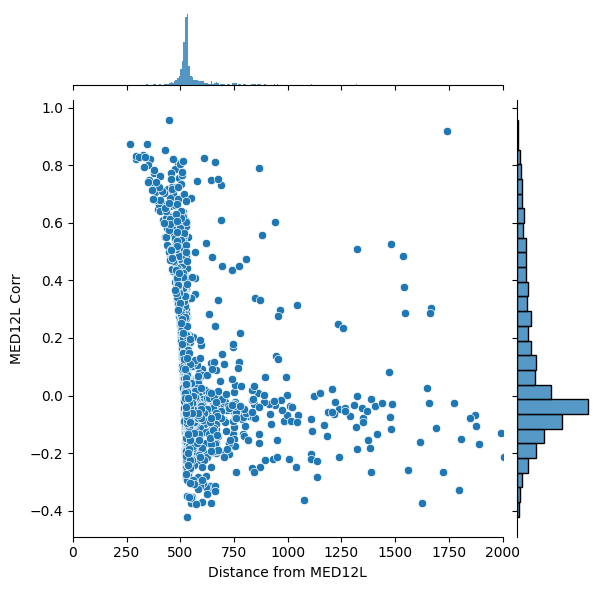

In [306]:
sns.jointplot(data = dist_df, x = "Distance from MED12L", y = "MED12L Corr")
plt.xlim(0, 2000)

In [307]:
lambert_MED12L_like_TFs_dist = dist_df[dist_df["Distance from MED12L"] <= np.percentile(dist_df["Distance from MED12L"], 5)]
lambert_MED12L_like_TFs_dist_5percentile = lambert_MED12L_like_TFs_dist["Gene"]
lambert_MED12L_like_TFs_corr = dist_df[dist_df["MED12L Corr"] >= np.percentile(dist_df["MED12L Corr"], 0.95)]

<Axes: ylabel='Gene'>

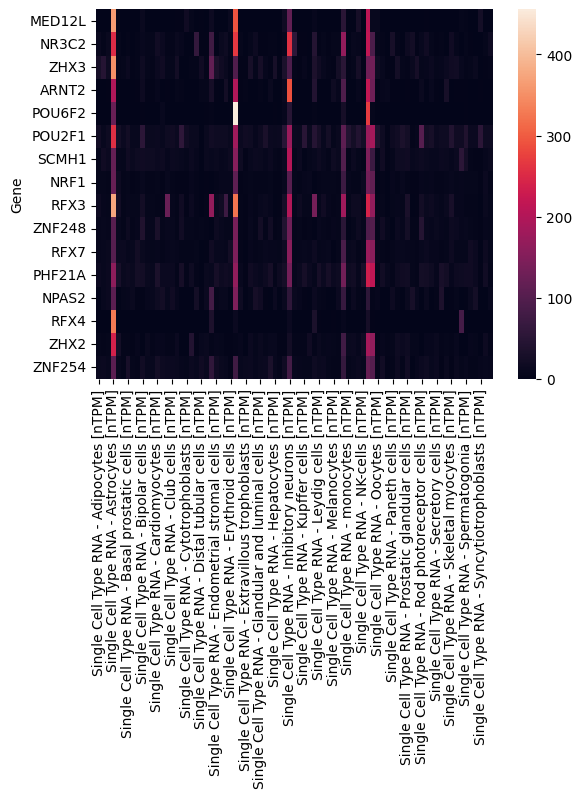

In [308]:
MED12L_similar_TF = dist_df.sort_values("Distance from MED12L")[:15]["Gene"]
MED12L_similar = pd.concat([MED12L_scrna.set_index("Gene"), tf_scrna_genes.loc[MED12L_similar_TF]])
sns.heatmap(MED12L_similar)

<Axes: ylabel='Gene'>

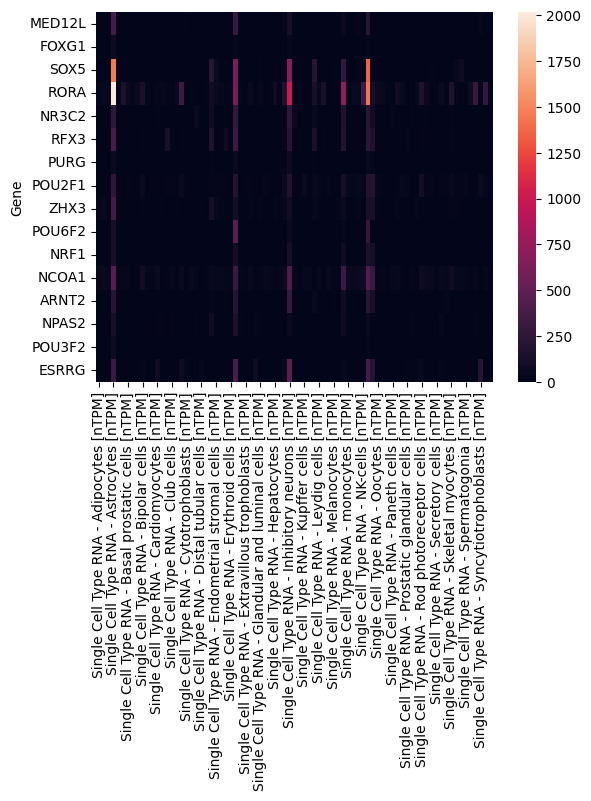

In [309]:
MED12L_similar_TF = dist_df.sort_values("MED12L Corr", ascending= False)[:15]["Gene"]
MED12L_similar = pd.concat([MED12L_scrna.set_index("Gene"), tf_scrna_genes.loc[MED12L_similar_TF]])
sns.heatmap(MED12L_similar)

<Axes: ylabel='Gene'>

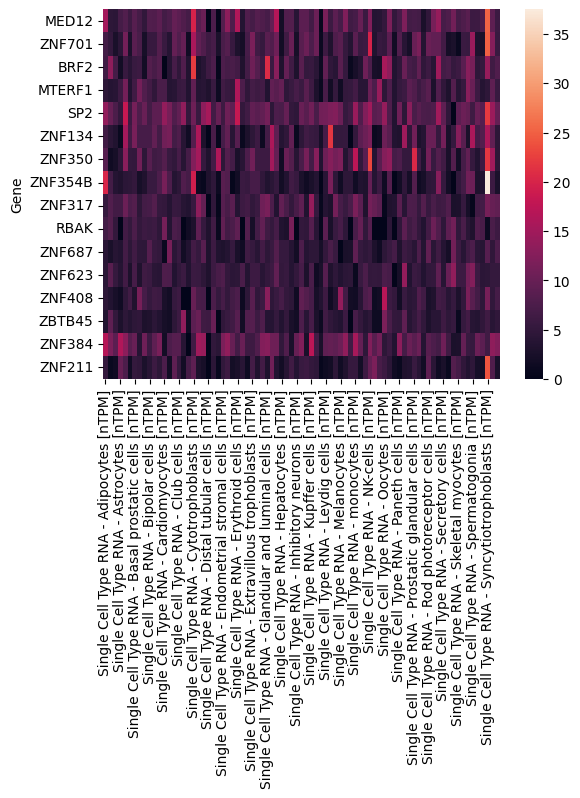

In [310]:
MED12_similar_TF = dist_df.sort_values("Distance from MED12")[:15]["Gene"]
MED12_similar = pd.concat([MED12_scrna.set_index("Gene"), tf_scrna_genes.loc[MED12_similar_TF]])
sns.heatmap(MED12_similar)

<Axes: ylabel='Gene'>

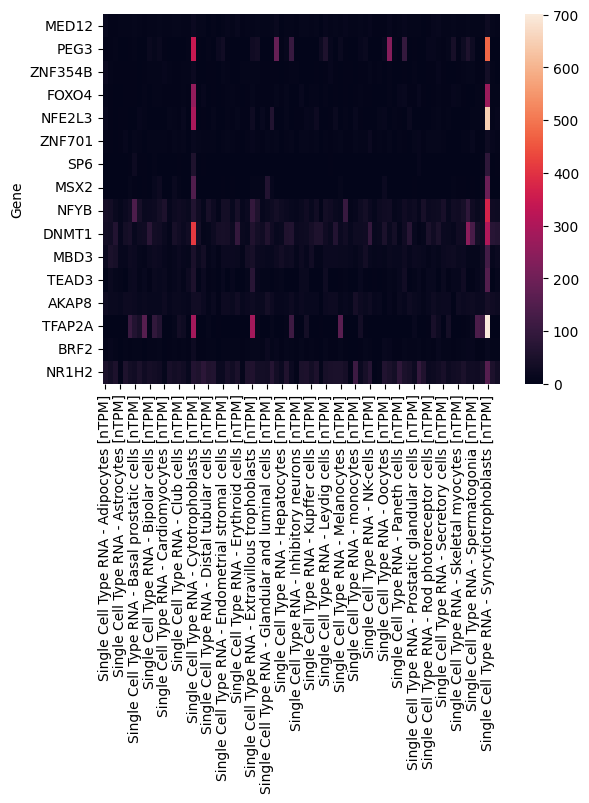

In [311]:
MED12_similar_TF = dist_df.sort_values("MED12 Corr", ascending= False)[:15]["Gene"]
MED12_similar = pd.concat([MED12_scrna.set_index("Gene"), tf_scrna_genes.loc[MED12_similar_TF]])
sns.heatmap(MED12_similar)

---
Protein Atlas Transcription Factors

In [384]:
proteinatlas_TFs = pd.read_csv("data/proteinatlas-TFs.tsv", sep="\t")
proteinatlas_TF_scRNA = pd.read_csv("helperdata/proteinatlasTF_scRNA.csv").drop("Unnamed: 0", axis=1).fillna(0)
proteinatlas_TF_scRNA = proteinatlas_TF_scRNA.drop("Ensembl", axis=1).set_index("Gene")

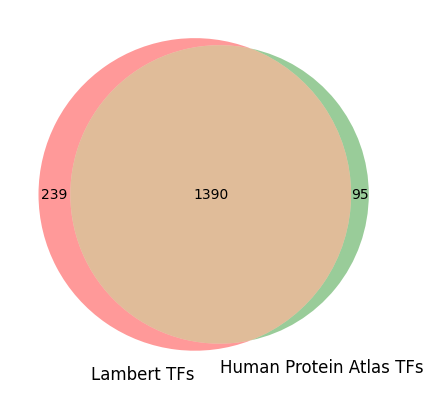

In [385]:
#Compare Lambert TFs to protein atlas
lambert_TFs_ensembl = set(tf_scrna.index.to_list())
proteinatlas_TFs_ensembl = set(proteinatlas_TFs["Ensembl"].to_list())

from matplotlib_venn import venn2
venn2([lambert_TFs_ensembl, proteinatlas_TFs_ensembl], ("Lambert TFs", "Human Protein Atlas TFs"))
plt.savefig("figures/lambert_vs_proteinatlas_TF_count.png")

In [386]:
#Combine all TFs
lambertonly_ensembls = [x for x in lambert_TFs_ensembl if x not in proteinatlas_TFs_ensembl] 
lambertonlyscRNA = tf_scrna.loc[lambertonly_ensembls]
allTF_scRNA = pd.concat([proteinatlas_TF_scRNA, lambertonlyscRNA.set_index("Gene")])
allTF_scRNA.head()

,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],Single Cell Type RNA - Bipolar cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Gene,,,,,,,,,,,,,,,,,,,,,
ADNP,42.9,49.9,32.7,81.1,34.8,48.9,52.2,23.1,29.0,37.7,...,38.1,35.1,39.8,26.5,34.5,30.2,40.6,22.0,41.0,33.1
ADNP2,15.9,13.4,17.0,20.7,9.4,30.9,16.5,10.9,18.6,16.4,...,0.0,6.8,13.6,43.9,38.1,24.1,32.0,9.6,16.9,14.6
AEBP2,21.2,14.8,22.7,30.0,24.1,58.1,29.7,17.1,52.3,23.5,...,13.6,18.5,37.6,16.0,24.9,52.1,63.2,87.5,30.2,11.8
AHR,75.9,73.1,67.8,1.5,25.0,47.0,34.6,57.8,55.0,18.3,...,10.9,4.9,35.0,1.6,1.9,27.9,45.7,20.8,47.2,10.6
AIRE,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.2,...,0.0,0.0,0.2,0.0,0.0,0.0,0.1,0.3,0.2,0.2


In [387]:
#Calculate distance and Pearson correlation between TFs and MED12L
MED12L_dists = []
MED12L_corrs = []

for i in range(len(allTF_scRNA)):
    row = allTF_scRNA.iloc[i]
    MED12L_dists.append(distance.euclidean(MED12L_scrna_arr, row))
    MED12L_corrs.append(stat.pearsonr(MED12L_scrna_arr, row).statistic)

MED12L_TF_comparison_df = pd.DataFrame({"Gene": allTF_scRNA.index.to_list(), "Distance from MED12L": MED12L_dists,
                        "MED12L Corr": MED12L_corrs})

#Get 1st percentile
MED12L_proteinatlasTF_similar_TF = MED12L_TF_comparison_df[MED12L_TF_comparison_df["Distance from MED12L"] <= np.percentile(MED12L_TF_comparison_df["Distance from MED12L"], 1)]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


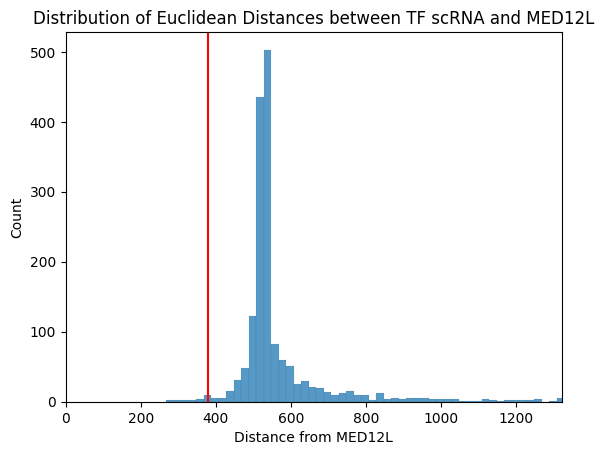

In [392]:
sns.histplot(MED12L_TF_comparison_df, x = "Distance from MED12L", binwidth=20)
plt.xlim(0, np.percentile(MED12L_TF_comparison_df["Distance from MED12L"], 95))
plt.axvline(np.percentile(MED12L_TF_comparison_df["Distance from MED12L"], 1), color = "r")
plt.title("Distribution of Euclidean Distances between TF scRNA and MED12L")
plt.savefig("figures/distancedistTF_MED12L.png")

In [402]:
proteinatlas_TF_scRNA.loc[[x for x in MED12L_proteinatlasTF_similar_TF["Gene"].to_list() if x in proteinatlas_TF_scRNA.index.to_list()]]

,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],Single Cell Type RNA - Bipolar cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Gene,,,,,,,,,,,,,,,,,,,,,
ARNT2,0.1,1.7,2.9,198.8,0.3,1.2,0.4,1.3,2.7,15.5,...,27.2,0.0,2.3,1.9,3.1,0.2,0.3,3.1,0.5,1.6
NPAS2,1.4,10.0,12.7,106.8,0.2,7.1,7.6,10.9,2.2,3.5,...,0.0,2.9,6.1,0.5,3.4,11.3,23.7,0.3,1.6,9.2
NR3C2,12.3,4.3,11.5,252.0,5.6,1.3,5.2,0.5,5.1,9.9,...,0.0,19.5,6.2,1.5,6.4,2.1,1.0,0.0,7.0,16.4
NRF1,6.3,6.4,4.7,120.4,15.5,5.3,6.0,3.0,4.4,9.2,...,5.4,9.8,6.3,7.8,6.4,6.2,6.3,3.3,12.6,5.2
POU2F1,19.8,9.5,17.5,256.7,24.4,13.3,22.5,9.5,9.8,53.1,...,16.3,40.0,18.3,19.0,38.7,13.1,13.0,52.4,16.9,17.1
POU6F2,0.0,0.1,0.2,122.6,0.0,0.0,0.0,0.0,0.0,3.3,...,0.0,0.0,1.5,0.4,2.2,0.2,0.0,0.1,0.0,0.2
RFX3,16.0,8.3,6.3,374.0,19.9,3.8,7.2,5.9,6.4,22.6,...,10.9,30.2,8.2,7.5,5.1,4.7,3.8,1.6,12.3,6.4
RFX4,0.0,0.0,0.1,328.8,0.0,0.0,0.0,0.0,0.0,0.7,...,0.0,1.0,0.1,82.9,2.7,0.0,0.0,0.0,0.1,0.0
RFX7,8.5,9.1,11.5,102.8,13.5,14.0,8.7,9.1,22.8,11.8,...,5.4,14.6,6.6,6.6,6.6,19.0,12.8,1.1,14.3,6.2


In [405]:
proteinatlas_TFs[[x in MED12L_proteinatlasTF_similar_TF["Gene"].to_list() for x in proteinatlas_TFs["Gene"]]]

,Gene,Gene synonym,Ensembl,Gene description,Uniprot,Chromosome,Position,Protein class,Biological process,Molecular function,...,Cancer prognostics - Pancreatic Adenocarcinoma (TCGA),Cancer prognostics - Pancreatic Adenocarcinoma (validation),Cancer prognostics - Prostate Adenocarcinoma (TCGA),Cancer prognostics - Rectum Adenocarcinoma (TCGA),Cancer prognostics - Rectum Adenocarcinoma (validation),Cancer prognostics - Skin Cuteneous Melanoma (TCGA),Cancer prognostics - Stomach Adenocarcinoma (TCGA),Cancer prognostics - Testicular Germ Cell Tumor (TCGA),Cancer prognostics - Thyroid Carcinoma (TCGA),Cancer prognostics - Uterine Corpus Endometrial Carcinoma (TCGA)
21,ARNT2,"bHLHe1, KIAA0307",ENSG00000172379,Aryl hydrocarbon receptor nuclear translocator 2,Q9HBZ2,15,80404350-80597933,"Disease related genes, Human disease related g...","Transcription, Transcription regulation",DNA-binding,...,unprognostic (1.86e-6),unprognostic (5.12e-2),unprognostic (1.35e-1),NaN,unprognostic (1.15e-1),unprognostic (6.56e-2),unprognostic (2.30e-1),unprognostic (2.37e-1),unprognostic (1.59e-1),unprognostic (1.54e-1)
567,NPAS2,"bHLHe9, MOP4, PASD4",ENSG00000170485,Neuronal PAS domain protein 2,Q99743,2,100820139-100996829,"Metabolic proteins, Predicted intracellular pr...","Biological rhythms, DNA damage, Transcription,...","Activator, DNA-binding",...,unprognostic (6.18e-3),unprognostic (6.52e-2),unprognostic (2.55e-1),unprognostic (1.90e-1),unprognostic (7.04e-2),unprognostic (2.07e-1),unprognostic (1.77e-1),unprognostic (1.37e-1),unprognostic (2.18e-3),unprognostic (1.18e-3)
587,NR3C2,"MLR, MR",ENSG00000151623,Nuclear receptor subfamily 3 group C member 2,P08235,4,148078762-148444698,"Disease related genes, FDA approved drug targe...","Transcription, Transcription regulation","DNA-binding, Receptor",...,unprognostic (1.29e-2),unprognostic (8.01e-2),unprognostic (1.64e-1),unprognostic (7.13e-2),unprognostic (5.77e-3),NaN,unprognostic (1.06e-1),NaN,unprognostic (1.39e-1),NaN
594,NRF1,"ALPHA-PAL, EWG",ENSG00000106459,Nuclear respiratory factor 1,Q16656,7,129611720-129757082,"Metabolic proteins, Predicted intracellular pr...","Transcription, Transcription regulation","Activator, DNA-binding",...,unprognostic (7.77e-3),unprognostic (1.22e-1),unprognostic (5.54e-2),unprognostic (1.06e-1),unprognostic (2.21e-2),unprognostic (3.15e-2),unprognostic (4.28e-1),unprognostic (3.24e-1),unprognostic (6.42e-2),unprognostic (1.89e-1)
644,POU2F1,"OCT1, OTF1",ENSG00000143190,POU class 2 homeobox 1,P14859,1,167220876-167427345,"Predicted intracellular proteins, Transcriptio...","Transcription, Transcription regulation","Activator, DNA-binding",...,unprognostic (6.73e-3),unprognostic (2.68e-1),unprognostic (1.94e-1),unprognostic (6.83e-2),unprognostic (1.37e-1),unprognostic (4.51e-1),unprognostic (9.43e-2),unprognostic (1.99e-1),unprognostic (1.19e-2),unprognostic (1.11e-1)
656,POU6F2,RPF-1,ENSG00000106536,POU class 6 homeobox 2,P78424,7,38977909-39493095,"Disease related genes, Human disease related g...","Transcription, Transcription regulation",DNA-binding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701,RFX3,NaN,ENSG00000080298,Regulatory factor X3,P48380,9,3218297-3526004,"Predicted intracellular proteins, Transcriptio...","Differentiation, Transcription, Transcription ...","Developmental protein, DNA-binding, Repressor",...,unprognostic (3.06e-2),unprognostic (2.06e-3),unprognostic (1.68e-1),unprognostic (5.63e-3),unprognostic (3.75e-2),unprognostic (1.19e-1),unprognostic (1.56e-1),unprognostic (1.04e-1),unprognostic (3.22e-2),unprognostic (2.83e-1)
702,RFX4,NaN,ENSG00000111783,Regulatory factor X4,Q33E94,12,106583004-106762803,"Predicted intracellular proteins, Transcriptio...","Transcription, Transcription regulation","Activator, DNA-binding",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,RFX7,"FLJ12994, RFXDC2",ENSG00000181827,Regulatory factor X7,Q2KHR2,15,56087280-56245082,"Predicted intracellular proteins, Transcriptio...","Transcription, Transcription reg

---
Related clusters from human protein atlas: Cluster 34 and 47


In [399]:
cluster34 = pd.read_csv("data/proteinatlas-cluster34.tsv", sep="\t")
cluster34scRNA = pd.read_csv("helperdata/cluster34_scRNA.csv").drop("Unnamed: 0", axis=1)
cluster34scRNA = cluster34scRNA.drop("Ensembl", axis=1).set_index("Gene")
cluster34scRNA.head()

,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],Single Cell Type RNA - Bipolar cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Gene,,,,,,,,,,,,,,,,,,,,,
ABCB6,0.1,0.4,0.5,13.9,0.2,0.4,0.4,0.2,1.8,0.7,...,0.0,0.0,0.5,0.5,0.1,2.8,0.4,0.2,0.3,0.1
ABLIM2,4.8,0.9,1.1,9.0,0.5,2.7,0.3,0.1,0.7,4.7,...,2.7,46.8,4.6,0.4,2.3,2.4,8.3,0.1,1.2,4.2
ACACA,6.2,29.9,64.5,131.0,8.5,18.1,17.8,14.4,24.4,13.0,...,8.2,3.9,9.3,20.4,17.6,27.0,21.2,16.5,8.2,10.4
ACTL6B,0.0,0.0,0.0,1.9,0.0,0.0,0.0,0.0,0.2,3.9,...,0.0,0.0,0.0,1.1,0.6,0.2,0.1,0.0,0.0,0.0
ADAM11,0.3,0.0,0.0,10.2,0.2,0.2,0.1,0.1,0.2,7.0,...,0.0,0.0,0.8,0.6,0.6,0.1,0.3,0.3,0.1,0.3


,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],Single Cell Type RNA - Bipolar cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Gene,,,,,,,,,,,,,,,,,,,,,
ABCB6,0.1,0.4,0.5,13.9,0.2,0.4,0.4,0.2,1.8,0.7,...,0.0,0.0,0.5,0.5,0.1,2.8,0.4,0.2,0.3,0.1
ABLIM2,4.8,0.9,1.1,9.0,0.5,2.7,0.3,0.1,0.7,4.7,...,2.7,46.8,4.6,0.4,2.3,2.4,8.3,0.1,1.2,4.2
ACACA,6.2,29.9,64.5,131.0,8.5,18.1,17.8,14.4,24.4,13.0,...,8.2,3.9,9.3,20.4,17.6,27.0,21.2,16.5,8.2,10.4
ACTL6B,0.0,0.0,0.0,1.9,0.0,0.0,0.0,0.0,0.2,3.9,...,0.0,0.0,0.0,1.1,0.6,0.2,0.1,0.0,0.0,0.0
ADAM11,0.3,0.0,0.0,10.2,0.2,0.2,0.1,0.1,0.2,7.0,...,0.0,0.0,0.8,0.6,0.6,0.1,0.3,0.3,0.1,0.3


<Axes: ylabel='Gene'>

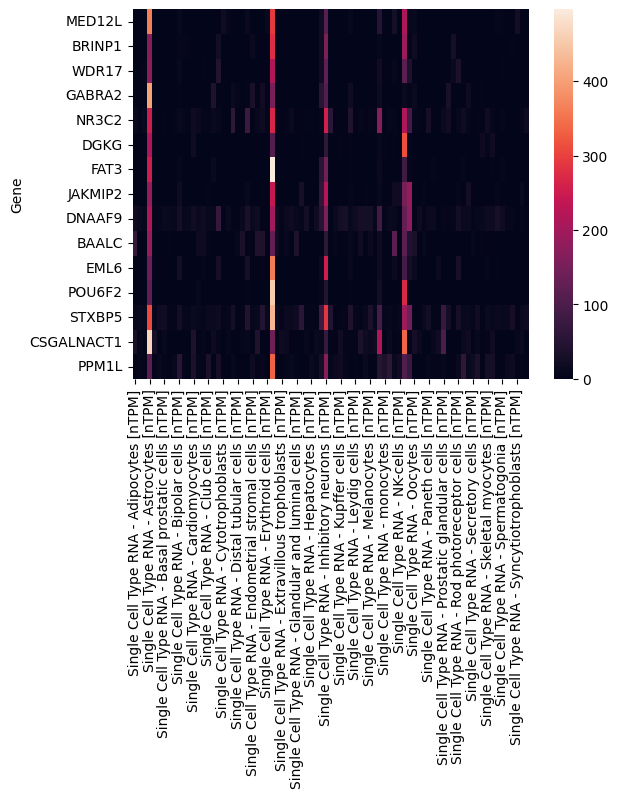

In [315]:

MED12L_cluster34_dists = []
MED12L_cluster34_corrs = []

for i in range(len(cluster34scRNA)):
    row = cluster34scRNA.iloc[i]
    MED12L_cluster34_dists.append(dist(MED12L_scrna_arr, row))
    MED12L_cluster34_corrs.append(stat.pearsonr(MED12L_scrna_arr, row).statistic)\

MED12L_dist_df = pd.DataFrame({"Gene": cluster34scRNA.index.to_list(), "Distance from MED12L": MED12L_cluster34_dists,
                        "MED12L Corr": MED12L_cluster34_corrs})

MED12L_similar_TF = MED12L_dist_df.sort_values("Distance from MED12L")[:15]["Gene"]
sns.heatmap(cluster34scRNA.loc[MED12L_similar_TF])

In [316]:
MED12L_dist_comb = MED12L_dist_df.merge(cluster34).set_index("Gene").sort_values("Distance from MED12L")[["Protein class", "Biological process", "Distance from MED12L", "MED12L Corr"]]
MED12L_dist_comb = MED12L_dist_comb.drop("MED12L", axis=0)
MED12L_dist_comb.head()

,Protein class,Biological process,Distance from MED12L,MED12L Corr
Gene,,,,
BRINP1,"Predicted intracellular proteins, Transporters","Cell cycle, Growth arrest, Neurogenesis",212.659046,0.923804
WDR17,"Predicted intracellular proteins, Predicted me...",NaN,239.878844,0.942978
GABRA2,"Disease related genes, FDA approved drug targe...","Ion transport, Transport",265.400377,0.857041
NR3C2,"Disease related genes, FDA approved drug targe...","Transcription, Transcription regulation",267.898750,0.873539
DGKG,"Enzymes, Metabolic proteins, Plasma proteins, ...",Lipid metabolism,275.421840,0.852493


In [317]:
MED12L_dist_comb["Biological process"] = MED12L_dist_comb["Biological process"].apply(lambda x: x.split(", ") if isinstance(x, str) else x)
MED12L_dist_comb["Protein class"] = MED12L_dist_comb["Protein class"].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

MED12L_dist_bioprocess = MED12L_dist_comb.explode("Biological process")
MED12L_dist_bioprocess.groupby("Biological process").agg("count").sort_values("Protein class", ascending=False)

,Protein class,Distance from MED12L,MED12L Corr
Biological process,,,
Transport,82,82,82
Ion transport,51,51,51
Transcription,40,40,40
Transcription regulation,40,40,40
Cell adhesion,25,25,25
...,...,...,...
Oogenesis,1,1,1
Peptide transport,1,1,1
Peroxisome biogenesis,1,1,1


In [318]:
MED12L_dist_TF = MED12L_dist_comb.explode("Protein class")
MED12L_dist_TF = MED12L_dist_TF[MED12L_dist_TF["Protein class"] == "Transcription factors"]
MED12L_dist_TF.head()

,Protein class,Biological process,Distance from MED12L,MED12L Corr
Gene,,,,
NR3C2,Transcription factors,"[Transcription, Transcription regulation]",267.898750,0.873539
POU6F2,Transcription factors,"[Transcription, Transcription regulation]",308.842112,0.828499
RFX3,Transcription factors,"[Differentiation, Transcription, Transcription...",344.481320,0.872544
NPAS2,Transcription factors,"[Biological rhythms, DNA damage, Transcription...",361.019902,0.822202
HIVEP2,Transcription factors,"[Transcription, Transcription regulation]",399.206363,0.660955


In [319]:
MED12L_dist_TF[:20]

,Protein class,Biological process,Distance from MED12L,MED12L Corr
Gene,,,,
NR3C2,Transcription factors,"[Transcription, Transcription regulation]",267.898750,0.873539
POU6F2,Transcription factors,"[Transcription, Transcription regulation]",308.842112,0.828499
RFX3,Transcription factors,"[Differentiation, Transcription, Transcription...",344.481320,0.872544
NPAS2,Transcription factors,"[Biological rhythms, DNA damage, Transcription...",361.019902,0.822202
HIVEP2,Transcription factors,"[Transcription, Transcription regulation]",399.206363,0.660955
MTA3,Transcription factors,NaN,416.983657,0.685848
ETV5,Transcription factors,NaN,431.954720,0.550938
CUX2,Transcription factors,"[Transcription, Transcription regulation]",437.425434,0.582083
E2F3,Transcription factors,"[Cell cycle, Transcription, Transcription regu...",451.815305,0.612241


In [320]:
MED12L_similar

,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],Single Cell Type RNA - Bipolar cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Gene,,,,,,,,,,,,,,,,,,,,,
MED12L,0.0,0.0,0.2,363.5,1.3,1.4,0.7,0.4,1.1,11.2,...,0.0,1.0,0.5,6.9,4.6,0.3,0.5,24.2,0.6,0.1
FOXG1,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.1,0.0,0.0,...,0.0,0.0,0.2,12.0,2.7,0.1,0.0,0.0,0.0,0.0
SOX5,3.5,1.2,6.9,1452.5,6.7,8.3,1.8,0.1,5.5,13.0,...,5.4,1.0,31.8,77.7,1.4,0.7,9.1,0.2,0.7,0.1
RORA,31.2,47.0,33.1,2015.7,19.6,146.9,62.8,16.7,52.3,136.1,...,21.8,158.1,31.2,1.7,3.7,77.6,277.5,4.5,260.6,2.1
NR3C2,12.3,4.3,11.5,252.0,5.6,1.3,5.2,0.5,5.1,9.9,...,0.0,19.5,6.2,1.5,6.4,2.1,1.0,0.0,7.0,16.4
RFX3,16.0,8.3,6.3,374.0,19.9,3.8,7.2,5.9,6.4,22.6,...,10.9,30.2,8.2,7.5,5.1,4.7,3.8,1.6,12.3,6.4
PURG,0.5,0.0,0.0,57.9,0.0,0.0,0.1,0.0,0.0,11.1,...,0.0,0.0,0.9,3.8,1.5,0.1,0.0,0.0,0.1,0.0
POU2F1,19.8,9.5,17.5,256.7,24.4,13.3,22.5,9.5,9.8,53.1,...,16.3,40.0,18.3,19.0,38.7,13.1,13.0,52.4,16.9,17.1
ZHX3,28.0,44.7,17.6,351.4,4.6,6.7,12.8,2.6,4.0,16.9,...,13.6,18.5,19.7,10.6,4.7,6.7,12.4,0.2,3.5,4.5


(0.0, 2000.0)

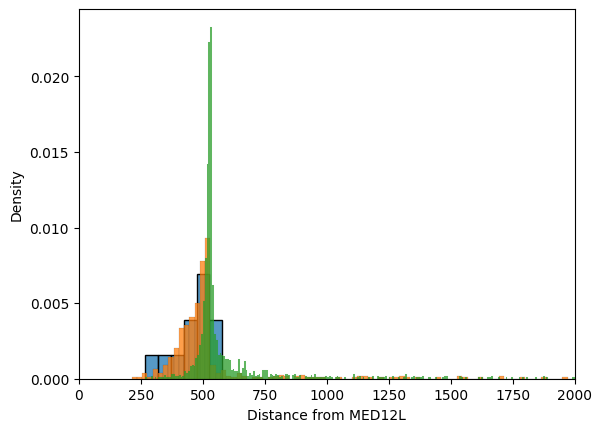

In [321]:
sns.histplot(MED12L_dist_TF, x = "Distance from MED12L", stat="density")
sns.histplot(MED12L_dist_comb, x = "Distance from MED12L", stat="density")
sns.histplot(dist_df, x = "Distance from MED12L", stat="density")
plt.xlim(0, 2000)

In [322]:
MED12L_dist_TF[MED12L_dist_TF["Distance from MED12L"] <= np.percentile(dist_df["Distance from MED12L"], 1)]

,Protein class,Biological process,Distance from MED12L,MED12L Corr
Gene,,,,
NR3C2,Transcription factors,"[Transcription, Transcription regulation]",267.898750,0.873539
POU6F2,Transcription factors,"[Transcription, Transcription regulation]",308.842112,0.828499
RFX3,Transcription factors,"[Differentiation, Transcription, Transcription...",344.481320,0.872544
NPAS2,Transcription factors,"[Biological rhythms, DNA damage, Transcription...",361.019902,0.822202


In [323]:
MED12L_dist_comb[MED12L_dist_comb["Distance from MED12L"] <= np.percentile(dist_df["Distance from MED12L"], 1)]

,Protein class,Biological process,Distance from MED12L,MED12L Corr
Gene,,,,
BRINP1,"[Predicted intracellular proteins, Transporters]","[Cell cycle, Growth arrest, Neurogenesis]",212.659046,0.923804
WDR17,"[Predicted intracellular proteins, Predicted m...",NaN,239.878844,0.942978
GABRA2,"[Disease related genes, FDA approved drug targ...","[Ion transport, Transport]",265.400377,0.857041
NR3C2,"[Disease related genes, FDA approved drug targ...","[Transcription, Transcription regulation]",267.898750,0.873539
DGKG,"[Enzymes, Metabolic proteins, Plasma proteins,...",[Lipid metabolism],275.421840,0.852493
FAT3,[Predicted membrane proteins],[Cell adhesion],275.985163,0.875579
JAKMIP2,"[Plasma proteins, Predicted intracellular prot...",NaN,294.597760,0.818328
DNAAF9,[Predicted intracellular proteins],NaN,297.933751,0.834916
BAALC,[Predicted intracellular proteins],NaN,306.785283,0.853816


<Axes: xlabel='MED12L Corr', ylabel='Density'>

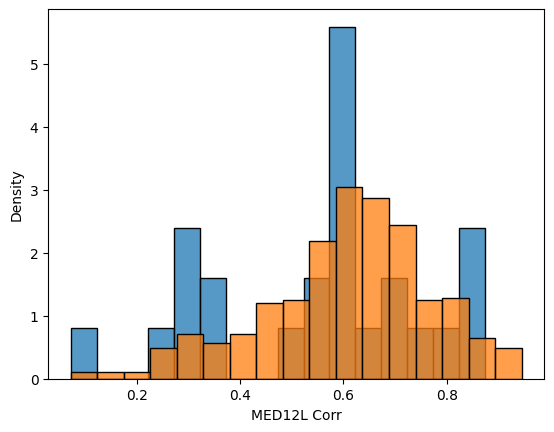

In [324]:
sns.histplot(MED12L_dist_TF, x = "MED12L Corr", stat="density", binwidth=0.05)
sns.histplot(MED12L_dist_comb, x = "MED12L Corr", stat="density", binwidth=0.05)

In [325]:
MED12L_dist_bioprocess

,Protein class,Biological process,Distance from MED12L,MED12L Corr
Gene,,,,
BRINP1,"[Predicted intracellular proteins, Transporters]",Cell cycle,212.659046,0.923804
BRINP1,"[Predicted intracellular proteins, Transporters]",Growth arrest,212.659046,0.923804
BRINP1,"[Predicted intracellular proteins, Transporters]",Neurogenesis,212.659046,0.923804
WDR17,"[Predicted intracellular proteins, Predicted m...",NaN,239.878844,0.942978
GABRA2,"[Disease related genes, FDA approved drug targ...",Ion transport,265.400377,0.857041
...,...,...,...,...
LRP1B,"[Cancer-related genes, Plasma proteins, Predic...",Endocytosis,6881.613835,0.824437
CSMD1,"[Plasma proteins, Predicted membrane proteins]",NaN,6998.974501,0.691500
KCNIP4,"[Predicted intracellular proteins, Transporters]",Ion transport,10464.646887,0.700284


(0.0, 1000.0)

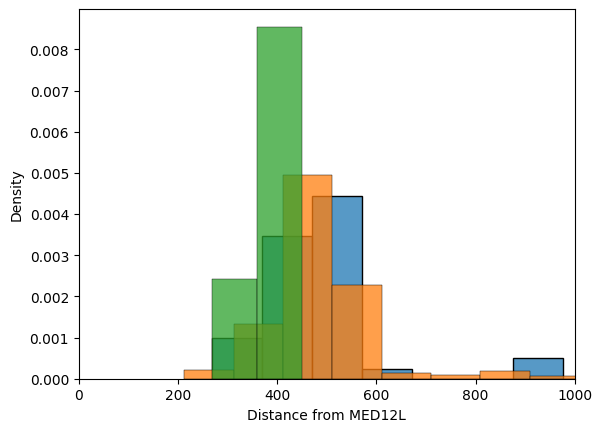

In [326]:
clust34_transcription = MED12L_dist_bioprocess[MED12L_dist_bioprocess["Biological process"] == "Transcription regulation"].drop(["Protein class", "Biological process"], axis = 1).drop_duplicates()
sns.histplot(clust34_transcription, x = "Distance from MED12L", stat="density", binwidth=100)
sns.histplot(MED12L_dist_comb, x = "Distance from MED12L", stat="density", binwidth=100)
sns.histplot(dist_df.sort_values("Distance from MED12L")[:50], x = "Distance from MED12L", stat="density", binwidth=100)
plt.xlim(0, 1000)

<Axes: xlabel='MED12L Corr', ylabel='Density'>

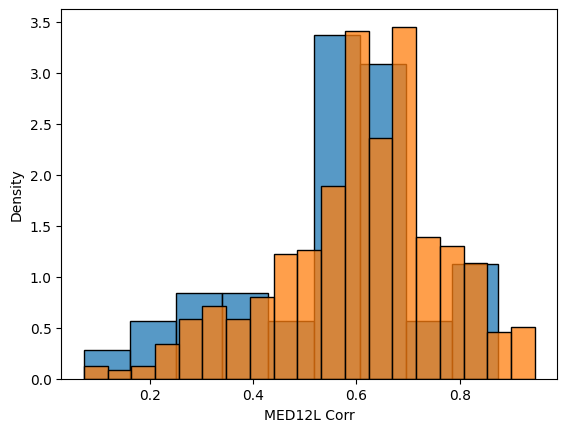

In [327]:
sns.histplot(clust34_transcription, x = "MED12L Corr", stat="density")
sns.histplot(MED12L_dist_comb, x = "MED12L Corr", stat="density")

<Axes: xlabel='MED12L Corr', ylabel='Density'>

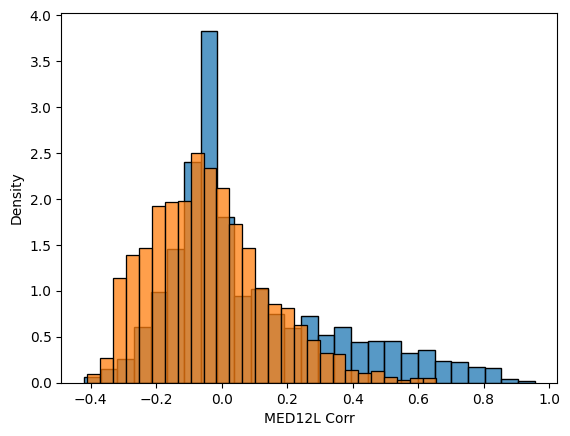

In [328]:
sns.histplot(dist_df.sort_values("MED12L Corr"), x = "MED12L Corr", stat="density")
sns.histplot(dist_df.sort_values("MED12 Corr"), x = "MED12 Corr", stat="density")

In [329]:
cluster34[[x in lambert_MED12L_like_TFs_dist_5percentile for x in cluster34["Gene"]]]

,Gene,Gene synonym,Ensembl,Gene description,Uniprot,Chromosome,Position,Protein class,Biological process,Molecular function,...,Cancer prognostics - Pancreatic Adenocarcinoma (TCGA),Cancer prognostics - Pancreatic Adenocarcinoma (validation),Cancer prognostics - Prostate Adenocarcinoma (TCGA),Cancer prognostics - Rectum Adenocarcinoma (TCGA),Cancer prognostics - Rectum Adenocarcinoma (validation),Cancer prognostics - Skin Cuteneous Melanoma (TCGA),Cancer prognostics - Stomach Adenocarcinoma (TCGA),Cancer prognostics - Testicular Germ Cell Tumor (TCGA),Cancer prognostics - Thyroid Carcinoma (TCGA),Cancer prognostics - Uterine Corpus Endometrial Carcinoma (TCGA)
